# Temporal Ordering of Alzheimer’s Biomarkers: Evidence from the TADPOLE Longitudinal Cohort
## Do amyloid, tau, and neurodegenerative biomarkers appear in a predictable sequence preceding cognitive decline?

The decision to focus on amyloid (A), tau (T), and neurodegeneration (N) biomarkers is based on the A/T/N Framework proposed by the National Institute on Aging and Alzheimer’s Association (NIA-AA, Jack et al., 2018).

These biomarkers follow the Alzheimer’s disease cascade:
(Amyloid deposition → Tau pathology → Neurodegeneration → Cognitive decline).

More details in the final report...

In [1]:
import pandas as pd
import numpy as np
import re #supports regular expressions (search, match, replace, etc.)

#### Create a datapath to make life easy

In [2]:
DATA_PATH = r"C:/Users/jdaly/OneDrive/Desktop/ISM645-Pred Analytics/TADPOLE/tadpole_challenge_201911210/tadpole_challenge/TADPOLE_D1_D2.csv"

#### Load the TADPOLE data, look at size/shape

In [3]:
df = pd.read_csv(DATA_PATH, low_memory=False) #It's a large dataset, but would like to keep datatype inference consistent
print("Shape of data: ",df.shape)

Shape of data:  (12741, 1907)


#### Preview the data

In [4]:
print("\n--- Preview of the first 5 rows ---")
display(df.head())


--- Preview of the first 5 rows ---


,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,,,,,,,,,,
1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,2005-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
2,3,011_S_0003,m06,11,1,0,ADNI1,ADNI1,2006-03-13,AD,...,,,,,,,,,,
3,3,011_S_0003,m12,11,1,0,ADNI1,ADNI1,2006-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
4,3,011_S_0003,m24,11,1,0,ADNI1,ADNI1,2007-09-12,AD,...,,,,,,,,,,


In [5]:
print("\n--- Dataset Information ---")
df.info()


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Columns: 1907 entries, RID to update_stamp_UPENNBIOMK9_04_19_17
dtypes: float64(72), int64(8), object(1827)
memory usage: 185.4+ MB


In [6]:
print("\n--- Data Types Summary ---")
print(df.dtypes.value_counts())


--- Data Types Summary ---
object     1827
float64      72
int64         8
dtype: int64


In [10]:
missing_ratio = df.isna().mean().sort_values(ascending=False)
print("\n--- Columns with Most Missing Data ---")
print(missing_ratio.head())


--- Top 10 Columns with Most Missing Data ---
PIB_bl           0.988541
PIB              0.982497
AV45             0.833765
FDG              0.736912
EcogSPOrgan      0.618711
EcogPtOrgan      0.614551
EcogSPDivatt     0.611333
MOCA             0.610156
EcogPtVisspat    0.608822
EcogPtDivatt     0.608665
dtype: float64


In [14]:
# Calculate missing percentage for each column
missing_percent = df.isna().mean() * 100

#Converting to dataframe and sort descending
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'MissingPercent']
missing_df = missing_df.sort_values(by='MissingPercent', ascending=False)
print(f"Total columns: {len(df.columns)}")
print("\n--- Top 50 columns with Most Missing Data ---")
display(missing_df.head(50))

print("\n--- Summary Stats ---")
print(missing_df.describe())

Total columns: 1907

--- Top 50 columns with Most Missing Data ---


,Column,MissingPercent
90,PIB_bl,98.854093
19,PIB,98.249745
20,AV45,83.376501
18,FDG,73.691233
42,EcogSPOrgan,61.871125
35,EcogPtOrgan,61.455145
43,EcogSPDivatt,61.133349
30,MOCA,61.015619
33,EcogPtVisspat,60.882191
36,EcogPtDivatt,60.866494



--- Summary Stats ---
       MissingPercent
count     1907.000000
mean         4.028187
std         10.206953
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.854093


In [16]:
#So many columns...moving this to a new CSV file for a full missing report.
missing_df.to_csv("missing_values_overview.csv", index=False)

#### Counting biomarkers vs. non-biomarker columns from the list of variables set to the CSV file

In [22]:
biomarker_candidate_cols = [col for col in df.columns if any (key in col.upper() for key in col.upper() 
                                                              for key in ['ABETA', 'TAU', 'PTAU','FDG', 'HIPP',
                                                                         'MMSE', 'ADAS', 'VENT', 'PIB', 'AV45',
                                                                         'VOLUME'])]
print(f"Biomarker Candidates: {len(biomarker_candidate_cols)}")
biomarker_candidate_cols[:15]



Biomarker Candidates: 293


['FDG',
 'PIB',
 'AV45',
 'ADAS11',
 'ADAS13',
 'MMSE',
 'Ventricles',
 'Hippocampus',
 'ADAS11_bl',
 'ADAS13_bl',
 'MMSE_bl',
 'Ventricles_bl',
 'Hippocampus_bl',
 'FDG_bl',
 'PIB_bl']

Jack CR Jr, Bennett DA, Blennow K, et al. (2018). NIA-AA Research Framework: Toward a biological definition of Alzheimer’s disease. Alzheimer's & Dementia.

This study adopts the A/T/N biomarker classification to structure analysis using the TADPOLE dataset, which contains longitudinal CSF, PET, MRI, and cognitive data from ADNI participants.

In [25]:
# Calculate missingness for each biomarker candidate and save to a CSV file for reference
biomarker_summary = pd.DataFrame(biomarker_candidate_cols, columns=['BiomarkerColumn'])
biomarker_summary['MissingPercent'] = biomarker_summary['BiomarkerColumn'].apply(lambda col: df[col].isna().mean() * 100)
biomarker_summary = biomarker_summary.sort_values(by='MissingPercent', ascending=False)
biomarker_summary.to_csv('biomarker_candidates_with_missingness.csv', index=False)

### Why these biomarkers?/Data quality and dealing with missing data
Biomarker selection was not arbitrary. I used the accepted A/T/N research framework for Alzheimer's disease (Jack et al., 2018), which classifies biomarkers as:

| Biomarker Type | Biological Process                   | Examples in Dataset |
|----------------|---------------------------------------|----------------------|
| **A (Amyloid)** | Amyloid beta deposition              | ABETA, AV45, PIB     |
| **T (Tau)**     | Aggregated tau pathology             | TAU, PTAU            |
| **N (Neurodegeneration)** | Neuronal injury or brain atrophy | FDG-PET, HippocampalVol, Ventricles, MRI metrics |

Based on this framework, I programmatically selected all columns containing these biomarker names, avoiding bias.


In [27]:
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [31]:
Miss_threshold = 30.0 #percent
bio_summary = missing_df[missing_df['Column'].isin(biomarker_candidate_cols)].copy()
bio_summary = bio_summary.merge(pd.DataFrame({'Column': biomarker_candidate_cols}), on='Column', how='right').fillna(0)
bio_summary = bio_summary.sort_values('MissingPercent', ascending=False)

print("Candidates (count)", len(bio_summary))
print("\nTop candidate missingness")
display(bio_summary.head(25))

Candidates (count) 293

Top candidate missingness


,Column,MissingPercent
14,PIB_bl,98.854093
1,PIB,98.249745
2,AV45,83.376501
0,FDG,73.691233
15,AV45_bl,54.870104
7,Hippocampus,46.613296
6,Ventricles,41.566596
4,ADAS13,30.743270
3,ADAS11,30.068283
5,MMSE,29.895613


In [32]:
filtered_biomarkers = bio_summary[bio_summary['MissingPercent'] < Miss_threshold]['Column'].tolist()
print(f"\nKeeping {len(filtered_biomarkers)} biomarkers with missingness < {Miss_threshold}%")
display(filtered_biomarkers)


Keeping 284 biomarkers with missingness < 30.0%


['MMSE',
 'FDG_bl',
 'PLSFDG01_BAIPETNMRC_09_12_16',
 'Hippocampus_bl',
 'HIPPL01_BAIPETNMRC_09_12_16',
 'NL1HIPP_BAIPETNMRC_09_12_16',
 'HIPPR06_BAIPETNMRC_09_12_16',
 'HIPPL06_BAIPETNMRC_09_12_16',
 'HIPPR01_BAIPETNMRC_09_12_16',
 'VENTRICLE_5TH_SIZE_UCBERKELEYAV45_10_17_16',
 'VENTRICLE_5TH_UCBERKELEYAV45_10_17_16',
 'VENTQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16',
 'Ventricles_bl',
 'ADAS13_bl',
 'VENTQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'ADAS11_bl',
 'RIGHT_VESSEL_SIZE_UCBERKELEYAV45_10_17_16',
 'RIGHT_VESSEL_UCBERKELEYAV45_10_17_16',
 'LEFT_VESSEL_SIZE_UCBERKELEYAV45_10_17_16',
 'LEFT_VESSEL_UCBERKELEYAV45_10_17_16',
 'PTAU_UPENNBIOMK9_04_19_17',
 'TAU_UPENNBIOMK9_04_19_17',
 'ABETA_UPENNBIOMK9_04_19_17',
 'CTX_RH_ROSTRALANTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
 'CTX_LH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV45_10_17_16',
 'CTX_LH_PARAHIPPOCAMPAL_UCBERKELEYAV45_10_17_16',
 'CTX_RH_ROSTRALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
 'LEFT_CAUDATE_UCBERKELEYAV45_10_17_16',
 

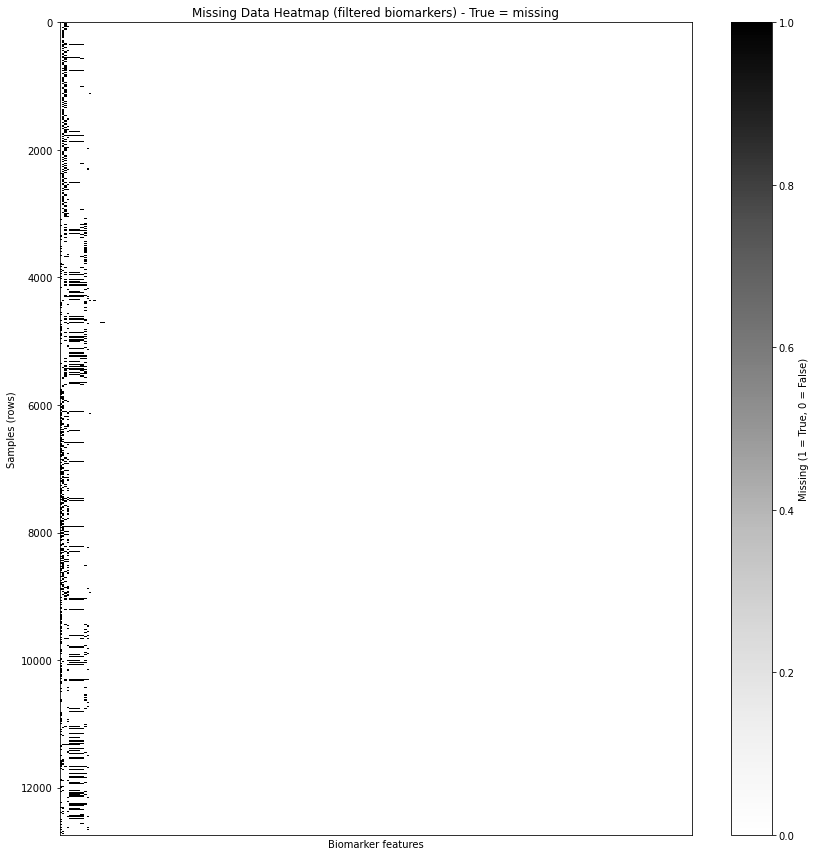

In [36]:
fb = filtered_biomarkers
if len(fb) == 0:
    print("No biomarkers passed the threshold, consider adjusting the threshold...")
else:
    sub = df[fb]
    arr = sub.isnull().to_numpy()
    plt.figure(figsize=(12, max(3, min(0.02*sub.shape[0], 12))))
    plt.imshow(arr, aspect='auto', cmap='Greys', interpolation='nearest')
    plt.title("Missing Data Heatmap (filtered biomarkers) - True = missing")
    if sub.shape[1] <= 40:
        plt.xticks(range(sub.shape[1]), sub.columns, rotation=90, fontsize=8)
    else:
        plt.xticks([])
    plt.ylabel("Samples (rows)")
    plt.xlabel("Biomarker features")
    plt.colorbar(label='Missing (1 = True, 0 = False)')
    plt.tight_layout()
    plt.show()

In [38]:
#Preparing numeric biomarker dataframe for imputation
numeric_biomarkers = [c for c in filtered_biomarkers if pd.api.types.is_numeric_dtype(df[c])]
print("Numeric biomarkers available for imputation:", len(numeric_biomarkers))
display(numeric_biomarkers)
bio_num = df[numeric_biomarkers].copy()
print("\nColumn missingness (numeric biomarkers):")
display(bio_num.isna().mean().sort_values(ascending=False).round(3).head(25))

Numeric biomarkers available for imputation: 7


['MMSE',
 'FDG_bl',
 'Hippocampus_bl',
 'Ventricles_bl',
 'ADAS13_bl',
 'ADAS11_bl',
 'MMSE_bl']


Column missingness (numeric biomarkers):


MMSE              0.299
FDG_bl            0.283
Hippocampus_bl    0.140
Ventricles_bl     0.038
ADAS13_bl         0.006
ADAS11_bl         0.001
MMSE_bl           0.000
dtype: float64

## Why use `StandardScaler` and `KNNImputer`?

The combination of `StandardScaler` and `KNNImputer` from *scikit-learn* allows for multivariate, biologically informed imputation.

## `StandardScaler()`
**Purpose:** Normalize numeric biomarker values before imputation.

- Biomarkers like **CSF_TAU**, **ABETA**, and **Hippocampal volume** are measured on very different scales (e.g., pg/mL vs mm³).
- KNN calculates distances between rows (patients). Without scaling, large-range variables dominate the distance metric.
- `StandardScaler` standardizes each feature to zero mean and unit variance so that all biomarkers contribute equally:
  
  \[
  z = \frac{x - \mu}{\sigma}
  \]

---

## `KNNImputer(n_neighbors=5)`
**Purpose:** Estimate missing values using patterns from the *K* most similar patients.

- For each missing value, the imputer identifies the **5 nearest neighbors** based on all other biomarker values.
- The missing value is replaced by the **mean** (or weighted mean) of those neighbors.
- This preserves the multivariate structure of the data — crucial when biomarkers are correlated (e.g., **low amyloid** often co-occurs with **high tau**).

---

##  Comparison to Median Imputation

| Method | Pros | Cons |
|--------|------|------|
| **Median** | Fast, robust to outliers, easy to interpret | Ignores correlations between biomarkers |
| **KNN (with scaling)** | Uses multivariate relationships, biologically meaningful | Slower, sensitive to feature scaling and outliers |

---

##  Interpretation in AD Context
In Alzheimer’s research, biomarkers such as **ABETA**, **TAU**, **PTAU**, and **Hippocampal volume** form correlated cascades.  
KNN imputation helps ensure that estimated values follow realistic patterns along this cascade — unlike median imputation, which treats each biomarker independently.

Median-imputed missing per column (this value should be zero now):


MMSE              0
FDG_bl            0
Hippocampus_bl    0
Ventricles_bl     0
ADAS13_bl         0
ADAS11_bl         0
MMSE_bl           0
dtype: int64

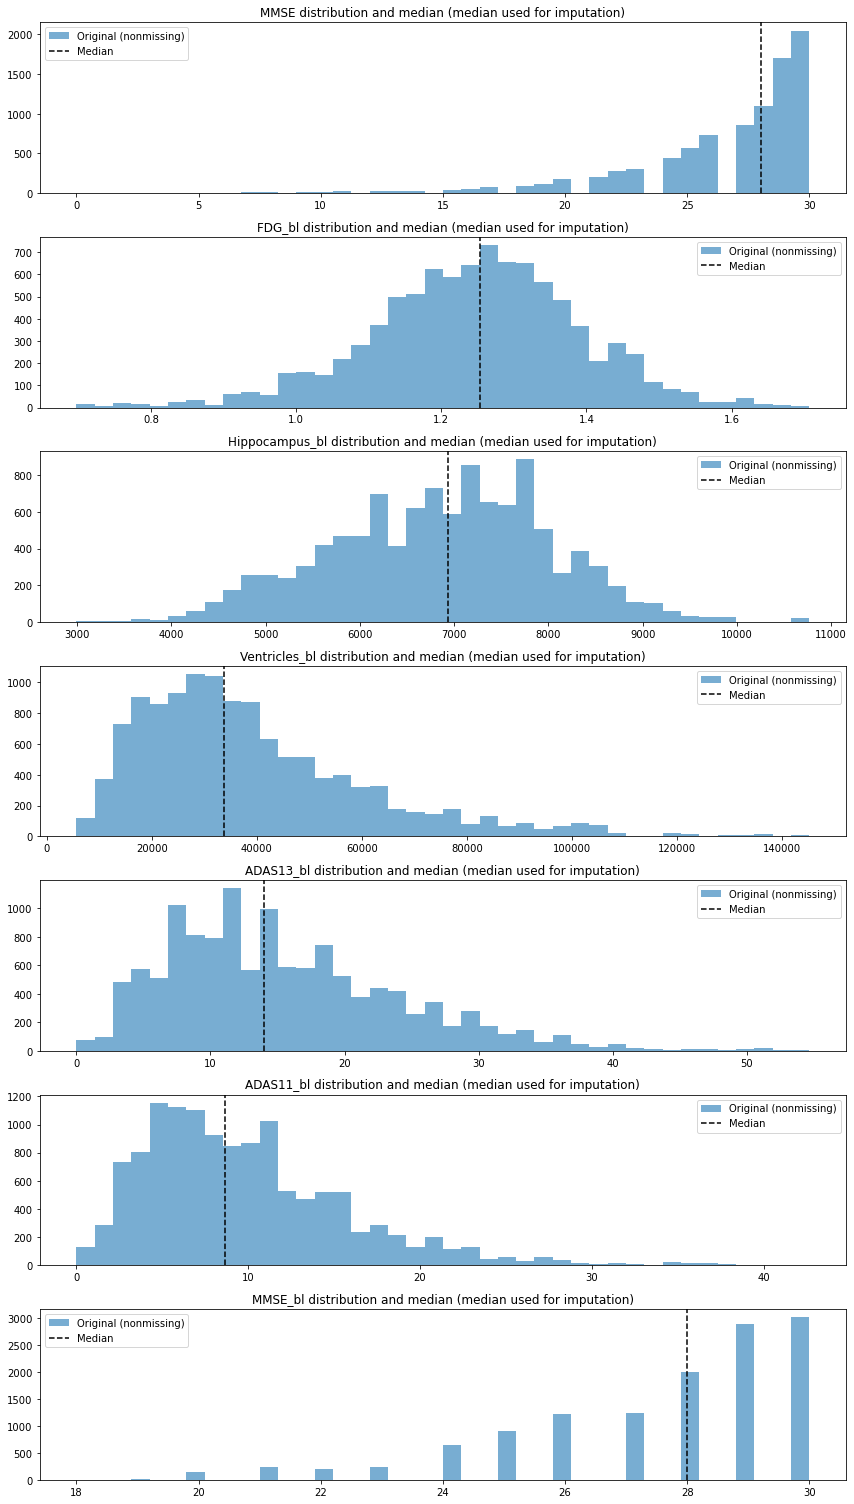

In [44]:
#Imputing by median values
bio_median = bio_num.copy()
medians = bio_median.median()
bio_median = bio_median.fillna(medians)
print("Median-imputed missing per column (this value should be zero now):")
display(bio_median.isna().sum().head(25))

example_vars = numeric_biomarkers[:]
if len(example_vars) > 0:
    plt.figure(figsize=(12, 3*len(example_vars)))
    for i, v in enumerate(example_vars, 1):
        plt.subplot(len(example_vars), 1, i)
        plt.hist(bio_num[v].dropna(), bins=40, alpha=0.6, label='Original (nonmissing)')
        plt.axvline(medians[v], color='k', linestyle='--', label='Median')
        plt.title(f"{v} distribution and median (median used for imputation)")
        plt.legend()
    plt.tight_layout()
    plt.show()

KNN imputation done. NaNs left: 0


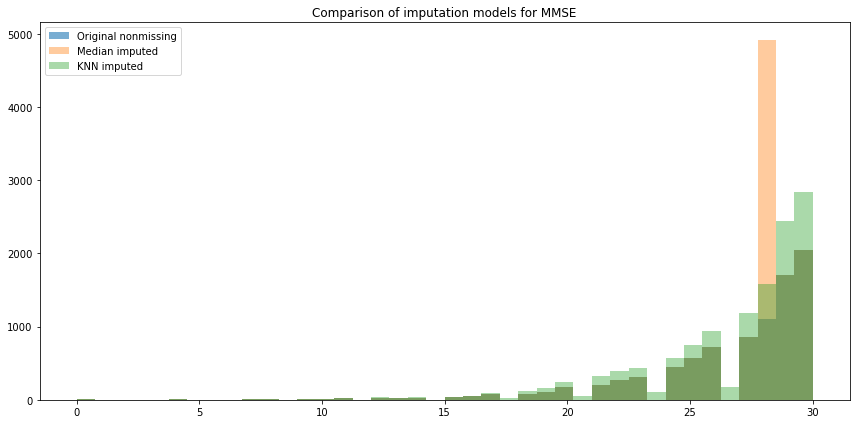

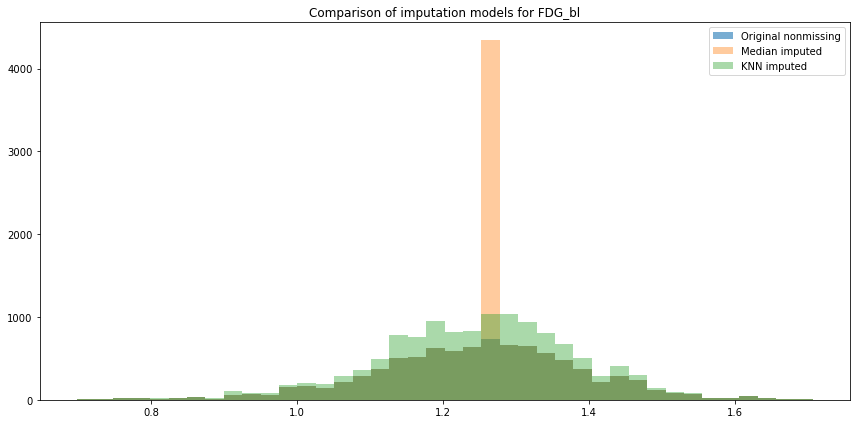

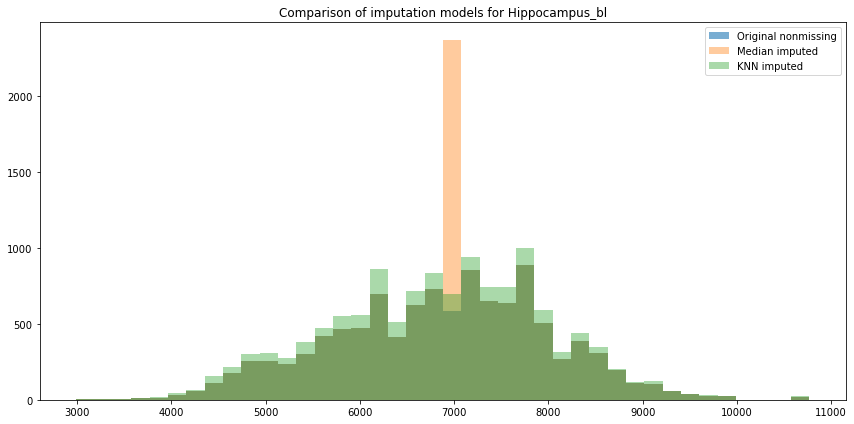

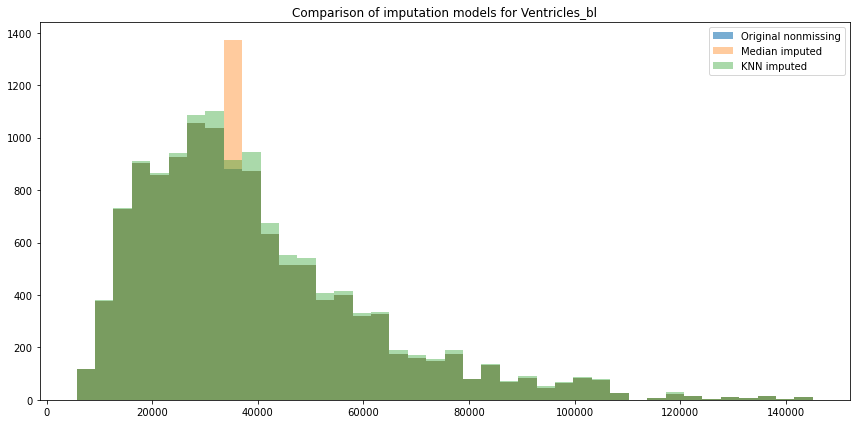

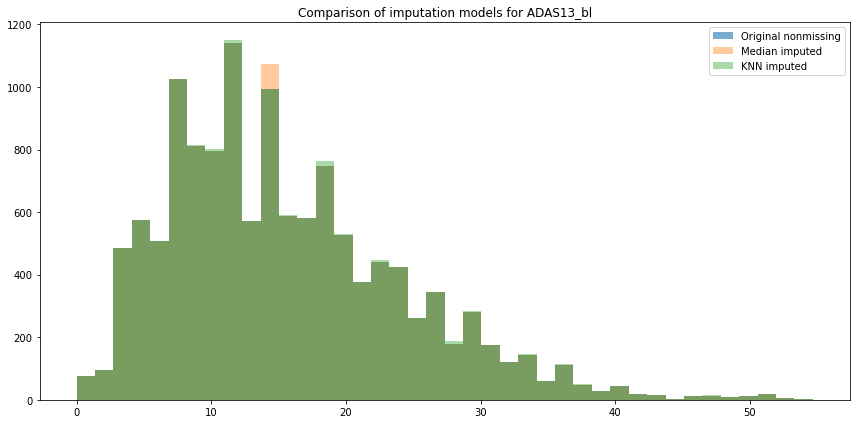

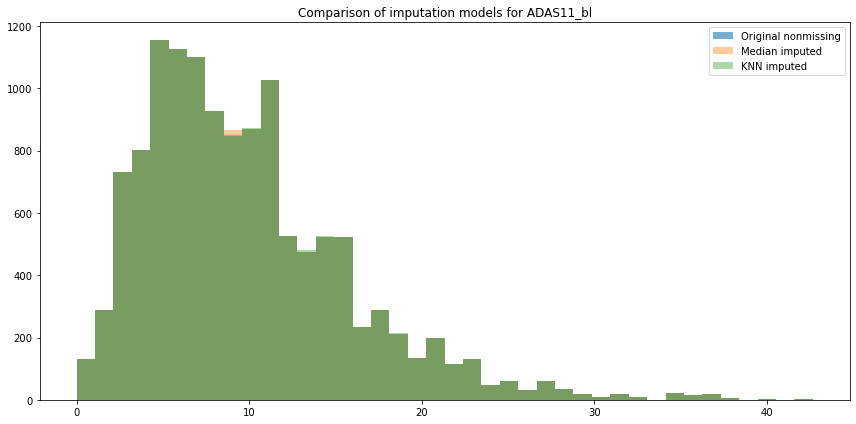

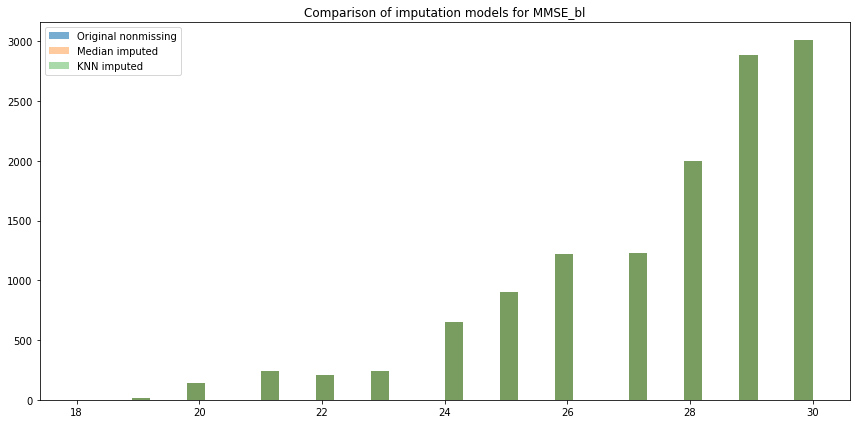

In [60]:
#KNN imputations (k=5) on standardized data
if bio_num.shape[1] > 0:
    scaler = StandardScaler()
    bio_scaled = pd.DataFrame(scaler.fit_transform(bio_num), columns=bio_num.columns, index=bio_num.index)
    imputer = KNNImputer(n_neighbors=5)
    knn_imputed_array = imputer.fit_transform(bio_scaled)
    knn_imputed_scaled = pd.DataFrame(knn_imputed_array, columns=bio_num.columns, index=bio_num.index)
    bio_knn = pd.DataFrame(scaler.inverse_transform(knn_imputed_scaled), columns=bio_num.columns, index=bio_num.index)
    print("KNN imputation done. NaNs left:", bio_knn.isna().sum().sum())
    if len(example_vars) > 0:
            v = example_vars[0]
            for i, v in enumerate(example_vars, 1):
                plt.figure(figsize=(12, 6))
                plt.hist(bio_num[v].dropna(), bins=40, alpha=0.6, label='Original nonmissing')
                plt.hist(bio_median[v], bins=40, alpha=0.4, label='Median imputed')
                plt.hist(bio_knn[v], bins=40, alpha=0.4, label='KNN imputed')
                plt.title(f"Comparison of imputation models for {v}")
                plt.tight_layout()
                plt.legend()
                plt.show()
else:
    print("No numeric biomarkers to impute...")  

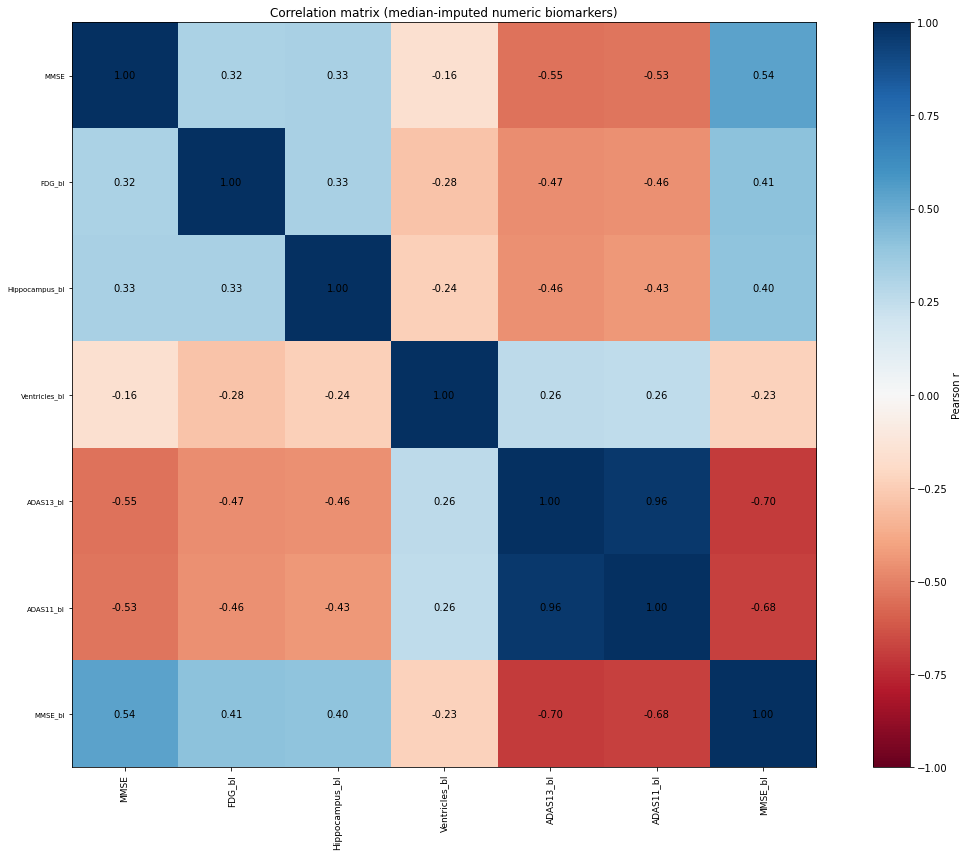

In [73]:
if 'bio_median' in globals() and bio_median.shape[1] > 0:
    corr = bio_median.corr()
    plt.figure(figsize=(16,12))
    plt.imshow(corr.values, interpolation='nearest', cmap='RdBu', vmin=-1, vmax=1)
    plt.colorbar(label='Pearson r')
    plt.title("Correlation matrix (median-imputed numeric biomarkers)")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=9)
    plt.yticks(range(len(corr.index)), corr.index, fontsize=7)
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            plt.text(j, i, f"{corr.values[i,j]:.2f}", ha='center', va='center', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print('No median-imputed biomarker data available for correlation heatmap.')

### Median imputation was used as a baseline approach to fill missing biomarker values due to its robustness and simplicity. To assess the stability of downstream analyses, I additionally applied KNN imputation (k=5) previously on standardized features to leverage multivariate dependencies among biomarkers. Comparison between the two imputations allowed me to evaluate whether the results were sensitive to imputation strategy.

## Exploring A/T/N biomarker interactions (clean, reproducible)

I now quantify and visualize how **Amyloid (A)**, **Tau (T)**, and **Neurodegeneration (N)** relate.

**Plan**
1. Select representative A/T/N biomarkers from the columns available.
2. Correlation matrix (median-imputed baseline), then (optional) compare with KNN-imputed.
3. Pairwise scatter plots for A–T, A–N, T–N (median-imputed baseline).
4. Simple regression: predict N from A and T (baseline on median-imputed), optionally compare with KNN.
5. (If diagnosis available) stratified scatter by DX to visualize cascade across CN→MCI→AD.

In [67]:
# A/T/N keyword grouping helper
import re

ATN_KEYWORDS = {
    "A": ["abeta", "amyloid", "av45", "pib", "aβ", "apcsf", "abeta42", "a?beta"],
    "T": ["ptau", "p-tau", "t-tau", "ttau", "tau", "phospho"],
    "N": ["hippocampus", "hippo", "fdg", "ventricle", "ventric", "volume", "vol", "icv", "wholebrain", "cortical"]
}

ATN_found = {k: [] for k in ATN_KEYWORDS}
for col in df.columns:
    low = col.lower()
    for group, keys in ATN_KEYWORDS.items():
        if any(k in low for k in keys):
            ATN_found[group].append(col)

print("=== A/T/N keyword matches in your dataframe ===")
for k, vals in ATN_found.items():
    print(f" {k} group: {len(vals)} matches")
    if vals:
        for v in sorted(vals)[:40]:
            print("  •", v)
        if len(vals) > 40:
            print(f"  ... (+{len(vals)-40} more)")

# Keep for next cell
ATN_found = {k: sorted(set(v)) for k, v in ATN_found.items()}

=== A/T/N keyword matches in your dataframe ===
 A group: 245 matches
  • ABETA_UPENNBIOMK9_04_19_17
  • AV45
  • AV45_bl
  • BRAINSTEM_SIZE_UCBERKELEYAV45_10_17_16
  • BRAINSTEM_UCBERKELEYAV45_10_17_16
  • CC_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16
  • CC_ANTERIOR_UCBERKELEYAV45_10_17_16
  • CC_CENTRAL_SIZE_UCBERKELEYAV45_10_17_16
  • CC_CENTRAL_UCBERKELEYAV45_10_17_16
  • CC_MID_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16
  • CC_MID_ANTERIOR_UCBERKELEYAV45_10_17_16
  • CC_MID_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16
  • CC_MID_POSTERIOR_UCBERKELEYAV45_10_17_16
  • CC_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16
  • CC_POSTERIOR_UCBERKELEYAV45_10_17_16
  • CEREBELLUMGREYMATTER_UCBERKELEYAV45_10_17_16
  • CINGULATE_UCBERKELEYAV45_10_17_16
  • COMPOSIT_REF_UCBERKELEYAV45_10_17_16
  • CSF_SIZE_UCBERKELEYAV45_10_17_16
  • CSF_UCBERKELEYAV45_10_17_16
  • CTX_LH_BANKSSTS_SIZE_UCBERKELEYAV45_10_17_16
  • CTX_LH_BANKSSTS_UCBERKELEYAV45_10_17_16
  • CTX_LH_CAUDALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16


### The A/T/N framework (Amyloid, Tau, Neurodegeneration) is a major research model in Alzheimer’s disease (Jack et al., 2016, Alzheimer’s & Dementia).
It characterizes individuals based on biomarker evidence for:

A (Amyloid) — β-amyloid pathology

T (Tau) — tau tangle pathology

N (Neurodegeneration) — neuronal injury or brain atrophy

Each of these corresponds to measurable biomarkers in the TADPOLE dataset (e.g., ABETA, PTAU, Hippocampus volume, FDG-PET, etc.).
However, the dataset contains hundreds of columns, and naming conventions vary across data releases — making it difficult to identify which columns correspond to which biological category.

### Purpose of the automatic selection

Instead of manually guessing which columns represent A, T, and N, I designed a semi-automated selection system that:

Scans all column names for known biomarker patterns (e.g., “abeta”, “ptau”, “fdg”, “hippocampus”).

Scores each potential column based on:

Keyword strength (match confidence)

Data modality hints (e.g., “CSF”, “PET”, “MRI”)

Missingness (penalizes incomplete variables)

Baseline suffixes (e.g., _bl, _baseline)

Biological directionality vs. disease severity (if diagnosis data exist)

Produces ranked candidates for A, T, and N with transparent reasoning.

This makes the process reproducible, explainable, and scalable to new datasets.

### How it works

Each column receives a weighted TotalScore, calculated as:

TotalScore = NameWeight + ModalityBonus + BaselineBonus + SignScore – MissingPenalty


NameWeight: How closely the variable name matches known biomarker patterns

ModalityBonus: Reward for contextually correct measurement source (e.g., CSF for A/T, MRI for N)

BaselineBonus: Extra weight for baseline measurements (_bl)

SignScore: Correlation of the variable with disease severity (e.g., Aβ ↓ as severity ↑)

MissingPenalty: Reduction for variables with >30% missing data

The top-ranked variable for each domain is selected as the “representative biomarker” (A, T, N).

### Why this is valuable

This approach balances automation and biological validity:

Ensures transparency, I can justify each choice numerically.

Encourages reproducibility, another researcher using the same code will get the same result.

Incorporates data-driven checks, only keeps variables whose statistical behavior aligns with known Alzheimer’s pathology.

Provides flexibility, can be refined later with metadata (e.g., CSF vs PET) or manual overrides.

### Limitations and next steps

This process helps identify candidates but does not replace expert judgment.

After automatic ranking, I review the chosen columns against ADNI/TADPOLE documentation to confirm biological relevance.

The framework can later be extended to include multi-modal integration or clustering to explore biomarker relationships more holistically.

### References

Jack, C. R. et al. (2016). A/T/N: An unbiased descriptive classification scheme for Alzheimer disease biomarkers. Alzheimer’s & Dementia, 12(4), 535–549.

Marinescu, R. V. et al. (2020). The Alzheimer’s Disease Neuroimaging Initiative and the TADPOLE Challenge: Predicting progression to Alzheimer’s disease. Scientific Reports, 10(1), 1–17.

In [70]:
# Automated representative selection from ATN_found
# Configuration
ATN_KEYWORDS = {
    "A": {
        "weights": {
            r"\babeta\b": 3.0, r"\babeta42\b": 3.2, r"\babeta142\b": 3.2,
            r"amyloid": 2.6, r"\bav45\b": 2.8, r"\bpib\b": 2.6, r"\bapcsf\b": 2.5
        },
        "modality_bonus": { "csf": 1.0, "av45": 0.8, "pib": 0.7, "amyloid": 0.5 },
        "expected_sign": -1
    },
    "T": {
        "weights": {
            r"\bptau\b": 3.2, r"\bp\-?tau\b": 3.2, r"\bt\-?tau\b": 2.8,
            r"\bttau\b": 2.8, r"\btau\b": 2.4, r"phospho": 2.4, r"flortaucipir": 2.2
        },
        "modality_bonus": { "csf": 1.0, "tau": 0.5 },
        "expected_sign": +1
    },
    "N": {
        "weights": {
            r"hippocamp": 3.2, r"\bfdg\b": 2.6, r"ventric": 2.2, r"wholebrain": 1.5,
            r"gray": 1.2, r"volume": 0.8, r"\bvol\b": 0.6, r"\bicv\b": 0.5
        },
        "modality_bonus": { "mri": 1.0, "fdg": 0.8, "ventric": 0.6, "hippo": 0.8 },
        "expected_sign": None
    }
}

BASELINE_SUFFIXES = ("_bl", "_baseline", "_blm")
BASELINE_BONUS = 0.6

MISSING_THRESH_1 = 0.30
MISSING_PENALTY_1 = 0.8
MISSING_PENALTY_2 = 1.2

DX_CANDIDATES = ["DX", "DX_bl", "DXCHANGE", "DIAGNOSIS"]
SEVERITY_MAPS = [
    {"CN": 0, "SMC": 0, "EMCI": 1, "MCI": 1, "LMCI": 2, "AD": 3, "Dementia": 3},
    {"Cognitively normal": 0, "MCI": 1, "Alzheimer's Disease": 3}
]

def find_dx_column(df):
    for c in DX_CANDIDATES:
        if c in df.columns:
            return c
    return None

def to_severity(series):
    s = series.astype(str).str.strip()
    for m in SEVERITY_MAPS:
        if s.isin(m.keys()).mean() > 0.5:
            return s.map(m)
    # numeric fallback
    return pd.to_numeric(series, errors="coerce")

def name_weight(col, patterns):
    score = 0.0
    for pat, wt in patterns.items():
        if re.search(pat, col, flags=re.IGNORECASE):
            score = max(score, wt)
    return score

def modality_bonus(col, bonus_map):
    b = 0.0
    cl = col.lower()
    for k, v in bonus_map.items():
        if k in cl:
            b = max(b, v)
    return b

def baseline_bonus(col):
    return BASELINE_BONUS if any(col.lower().endswith(sfx) for sfx in BASELINE_SUFFIXES) else 0.0

def missing_penalty(series):
    miss = series.isna().mean()
    if miss > 0.50: return MISSING_PENALTY_1 + MISSING_PENALTY_2
    if miss > MISSING_THRESH_1: return MISSING_PENALTY_1
    return 0.0

def expected_sign_for_N(col):
    cl = col.lower()
    if "hippo" in cl or "fdg" in cl or "cortex" in cl or "gray" in cl or "wholebrain" in cl:
        return -1
    if "ventric" in cl:
        return +1
    return None

def sign_score(series, sev, expected_sign):
    if sev is None or expected_sign is None:
        return 0.0
    mask = series.notna() & sev.notna()
    if mask.sum() < 30:
        return 0.0
    rho = series[mask].rank().corr(sev[mask].rank())  # Spearman via ranks
    return float(np.clip(rho * expected_sign, 0, 1.0))  # only reward correct direction

# Safe scorer: returns an EMPTY DF with expected columns when no rows
_EXPECTED_COLS = ["Group","Column","NameWeight","ModalityBonus","BaselineBonus","SignScore","MissingPenalty","TotalScore"]

def score_group(df, group_key, keyconf, sev):
    rows = []
    for col in df.columns:
        nw = name_weight(col, keyconf["weights"])
        if nw <= 0:
            continue
        mb = modality_bonus(col, keyconf["modality_bonus"])
        bb = baseline_bonus(col)
        mp = missing_penalty(df[col])
        exp = expected_sign_for_N(col) if group_key == "N" else keyconf["expected_sign"]
        ss = sign_score(df[col], sev, exp)
        total = nw + mb + bb + ss - mp
        rows.append({
            "Group": group_key, "Column": col, "NameWeight": nw, "ModalityBonus": mb,
            "BaselineBonus": bb, "SignScore": ss, "MissingPenalty": mp, "TotalScore": total
        })
    if not rows:
        return pd.DataFrame(columns=_EXPECTED_COLS)
    return pd.DataFrame(rows).sort_values("TotalScore", ascending=False)

# Run scoring (with relaxed fallback if a group is empty)
dx_col = find_dx_column(df)
sev = to_severity(df[dx_col]) if dx_col else None

scores_A = score_group(df, "A", ATN_KEYWORDS["A"], sev)
scores_T = score_group(df, "T", ATN_KEYWORDS["T"], sev)
scores_N = score_group(df, "N", ATN_KEYWORDS["N"], sev)

def relaxed_candidates(df, substrings):
    cols = []
    for c in df.columns:
        cl = c.lower()
        if any(s in cl for s in substrings):
            cols.append(c)
    return sorted(set(cols))

# If any group has no candidates, try a relaxed pass
if scores_A.empty:
    relA = relaxed_candidates(df, ["abeta", "amyloid", "av45", "pib"])
    if relA:
        ATN_KEYWORDS["A"]["weights"].update({rf"{re.escape(x)}": 2.0 for x in relA})
        scores_A = score_group(df, "A", ATN_KEYWORDS["A"], sev)

if scores_T.empty:
    relT = relaxed_candidates(df, ["ptau", "p-tau", "ttau", "t-tau", "tau"])
    if relT:
        ATN_KEYWORDS["T"]["weights"].update({rf"{re.escape(x)}": 2.0 for x in relT})
        scores_T = score_group(df, "T", ATN_KEYWORDS["T"], sev)

if scores_N.empty:
    relN = relaxed_candidates(df, ["hippo", "fdg", "ventric", "volume", "vol", "icv", "wholebrain", "gray"])
    if relN:
        ATN_KEYWORDS["N"]["weights"].update({rf"{re.escape(x)}": 1.5 for x in relN})
        scores_N = score_group(df, "N", ATN_KEYWORDS["N"], sev)

def show_top(df_sc, k=10, label=""):
    if df_sc.empty:
        print(f"\nNo candidates found for {label}.")
    else:
        print(f"\nTop {min(k, len(df_sc))} {label} candidates by score:")
        display(df_sc.head(k)[["Column","TotalScore","NameWeight","ModalityBonus","BaselineBonus","SignScore","MissingPenalty"]])

show_top(scores_A, 12, "Amyloid (A)")
show_top(scores_T, 12, "Tau (T)")
show_top(scores_N, 12, "Neurodegeneration (N)")

def pick_rep_from_scores(scored_df, prefer_suffixes=BASELINE_SUFFIXES):
    if scored_df.empty:
        return None
    top = scored_df.head(5).copy()
    bl = top[top["Column"].str.lower().str.endswith(prefer_suffixes)]
    if not bl.empty:
        return bl.iloc[0]["Column"]
    return top.iloc[0]["Column"]

A_rep = pick_rep_from_scores(scores_A)
T_rep = pick_rep_from_scores(scores_T)

N_rep = None
if not scores_N.empty:
    topN = scores_N.head(8).copy()
    for key in ["hippo", "fdg", "ventric"]:
        m = topN[topN["Column"].str.lower().str.contains(key)]
        if not m.empty:
            N_rep = m.iloc[0]["Column"]; break
    if N_rep is None:
        N_rep = topN.iloc[0]["Column"]

print("\nChosen representatives (auto; review these):")
print(" A (Amyloid):", A_rep)
print(" T (Tau):", T_rep)
print(" N (Neurodegeneration):", N_rep)

ATN_triplet = {"A": A_rep, "T": T_rep, "N": N_rep}

# If any still None, print guidance
missing = [k for k,v in ATN_triplet.items() if v is None]
if missing:
    print("\nStill missing:", ", ".join(missing))
    print("Run a quick search to see what exists, e.g.:")
    print("[c for c in df.columns if 'tau' in c.lower()]")


Top 2 Amyloid (A) candidates by score:


,Column,TotalScore,NameWeight,ModalityBonus,BaselineBonus,SignScore,MissingPenalty
1,AV45,1.6,2.8,0.8,0.0,0.0,2.0
0,PIB,1.3,2.6,0.7,0.0,0.0,2.0



Top 2 Tau (T) candidates by score:


,Column,TotalScore,NameWeight,ModalityBonus,BaselineBonus,SignScore,MissingPenalty
0,TAU_UPENNBIOMK9_04_19_17,2.5,2.0,0.5,0.0,0.0,0.0
1,PTAU_UPENNBIOMK9_04_19_17,2.5,2.0,0.5,0.0,0.0,0.0



Top 12 Neurodegeneration (N) candidates by score:


,Column,TotalScore,NameWeight,ModalityBonus,BaselineBonus,SignScore,MissingPenalty
6,Hippocampus_bl,4.6,3.2,0.8,0.6,0.0,0.0
22,RIGHT_HIPPOCAMPUS_UCBERKELEYAV45_10_17_16,4.0,3.2,0.8,0.0,0.0,0.0
35,CTX_RH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV1451_1...,4.0,3.2,0.8,0.0,0.0,0.0
23,RIGHT_HIPPOCAMPUS_SIZE_UCBERKELEYAV45_10_17_16,4.0,3.2,0.8,0.0,0.0,0.0
32,CTX_LH_PARAHIPPOCAMPAL_UCBERKELEYAV1451_10_17_16,4.0,3.2,0.8,0.0,0.0,0.0
33,CTX_LH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV1451_1...,4.0,3.2,0.8,0.0,0.0,0.0
19,LEFT_HIPPOCAMPUS_SIZE_UCBERKELEYAV45_10_17_16,4.0,3.2,0.8,0.0,0.0,0.0
18,LEFT_HIPPOCAMPUS_UCBERKELEYAV45_10_17_16,4.0,3.2,0.8,0.0,0.0,0.0
17,CTX_RH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV45_10_...,4.0,3.2,0.8,0.0,0.0,0.0
16,CTX_RH_PARAHIPPOCAMPAL_UCBERKELEYAV45_10_17_16,4.0,3.2,0.8,0.0,0.0,0.0



Chosen representatives (auto; review these):
 A (Amyloid): AV45
 T (Tau): TAU_UPENNBIOMK9_04_19_17
 N (Neurodegeneration): Hippocampus_bl


Analyzing biomarker interaction among: ['AV45', 'TAU_UPENNBIOMK9_04_19_17', 'Hippocampus_bl']

=== A/T/N Variable Integrity Report ===


,dtype,missing_count,missing_%,unique_values,constant_flag,status
AV45,float64,10623,83.38,2090,False,OK
TAU_UPENNBIOMK9_04_19_17,float64,10379,81.46,1779,False,OK
Hippocampus_bl,float64,1781,13.98,1264,False,OK



Computing correlations for: ['AV45', 'TAU_UPENNBIOMK9_04_19_17', 'Hippocampus_bl']


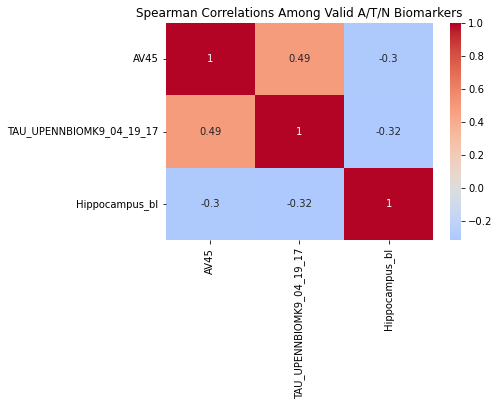

In [91]:
# A/T/N Correlation Diagnostic
subset_cols = [ATN_triplet["A"], ATN_triplet["T"], ATN_triplet["N"]]
subset_cols = [c for c in subset_cols if c in df.columns]

print("Analyzing biomarker interaction among:", subset_cols)
check_df = df[subset_cols].copy()

# Check data types
dtype_report = check_df.dtypes.astype(str)

# Coerce to numeric (in case of 'object' or string numbers)
for col in subset_cols:
    if check_df[col].dtype == "object":
        check_df[col] = pd.to_numeric(check_df[col], errors="coerce")

# Compute key stats
summary = pd.DataFrame(index=subset_cols)
summary["dtype"] = dtype_report
summary["missing_count"] = check_df.isna().sum()
summary["missing_%"] = (check_df.isna().mean() * 100).round(2)
summary["unique_values"] = check_df.nunique()
summary["constant_flag"] = summary["unique_values"] <= 1

# Identify exclusion reasons
def exclusion_reason(row):
    if row["constant_flag"]:
        return "Constant value (zero variance)"
    elif row["missing_%"] > 95:
        return "Too sparse (>95% missing)"
    elif "object" in row["dtype"].lower():
        return "Non-numeric type"
    else:
        return "OK"
summary["status"] = summary.apply(exclusion_reason, axis=1)

print("\n=== A/T/N Variable Integrity Report ===")
display(summary)

# Correlation calculation
valid_cols = [col for col in subset_cols if summary.loc[col, "status"] == "OK"]
if len(valid_cols) < 2:
    print("\nNot enough valid numeric variables to compute correlations.")
else:
    corr = check_df[valid_cols].corr(method="spearman")
    print("\nComputing correlations for:", valid_cols)
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title("Spearman Correlations Among Valid A/T/N Biomarkers")
    plt.show()

# If any dropped
dropped = summary[summary["status"] != "OK"]
if not dropped.empty:
    print("\nThe following biomarkers were excluded from the heatmap:")
    display(dropped[["missing_%", "unique_values", "status"]])

### Interpretation and Next Steps: Using A/T/N Biomarkers in the Analysis
#### Objective

After identifying representative biomarkers for Amyloid (A), Tau (T), and Neurodegeneration (N), the next stage of analysis aims to examine their interactions and progression dynamics within the Alzheimer’s disease cascade.

The central research question guiding this stage is:

“How do changes in amyloid, tau, and neurodegeneration biomarkers relate to one another across the Alzheimer’s disease trajectory?”

### Analytical Framework

Pairwise Correlations (Exploratory Stage)

Compute and visualize correlations between A, T, and N biomarkers.

Expected biological trends:

A↓ (Amyloid decreases) is associated with T↑ (Tau increases).

T↑ is linked to N↓ (Neurodegeneration, e.g., reduced hippocampal volume).

This provides a quantitative map of how biomarker signals evolve together.

### Regression Modeling (Predictive Stage)

Build linear or logistic models to test whether A or T predicts N.

This helps estimate how much tau burden and amyloid load explain neurodegeneration — consistent with the amyloid cascade hypothesis.

Disease Progression Modeling (Longitudinal / Staging Stage)

If multiple visits exist (RID, Month, DX), examine how biomarkers evolve over time.

Plot A/T/N trajectories by diagnosis group (CN → MCI → AD) to visualize the cascade sequence.

### Interpretation Guidelines
#### Relationship  -> Expected Biological Direction -> Interpretation
A → T -> Amyloid pathology precedes and promotes Tau accumulation -> Supports amyloid cascade theory

T → N -> Tau pathology leads to neuronal injury and atrophy -> Indicates tau-mediated neurodegeneration

A ↛ N -> Amyloid does not directly cause atrophy but acts through Tau -> Implies indirect causal chain

Group-wise comparison (CN, MCI, AD) -> Progressive increase in T and N abnormalities -> Confirms disease staging validity

By testing these relationships, I can empirically evaluate whether the data supports the AT(N) framework’s predicted temporal ordering:

Aβ deposition → Tau pathology → Neurodegeneration → Cognitive decline

### Deliverables and Expected Insights

Scatterplots / Pairwise regressions → Quantify A–T–N interactions

Trajectory plots → Visualize the biomarker cascade across diagnostic stages

Summary metrics → Validate that observed relationships align with established AD progression models

Together, these analyses will provide a data-driven validation of the A/T/N cascade, demonstrating whether the biomarkers behave in the expected biological order within the TADPOLE dataset.

Analyzing biomarker interaction among: ['AV45', 'TAU_UPENNBIOMK9_04_19_17', 'Hippocampus_bl']


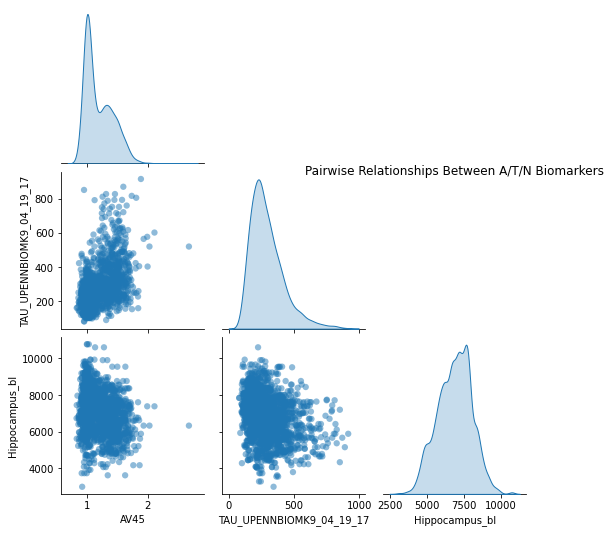

Stratifying scatterplots by DX...


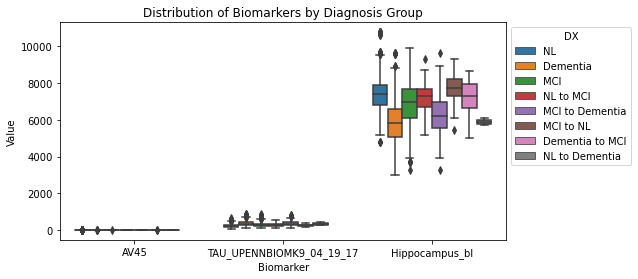

In [92]:
# A/T/N Correlation and Interaction Analysis
import seaborn as sns

#Extracting the selected biomarker variables
A, T, N = ATN_triplet["A"], ATN_triplet["T"], ATN_triplet["N"]
subset_cols = [c for c in [A, T, N] if c in df.columns]

print("Analyzing biomarker interaction among:", subset_cols)

# View scatterplot pairwise relationships
sns.pairplot(df[subset_cols], diag_kind='kde', corner=True,
            plot_kws={'alpha':0.5, 's':40, 'edgecolor':'none'})
plt.title("Pairwise Relationships Between A/T/N Biomarkers", y=2.0)
plt.show()

# Stratified visualization by clinical diagnosis
dx_col = None
for cand in ["DX", "DX_bl", "DXCHANGE", "DIAGNOSIS"]:
    if cand in df.columns:
        dx_col = cand
        break

if dx_col:
    print(f"Stratifying scatterplots by {dx_col}...")
    melt_df = df.melt(id_vars=[dx_col], value_vars=subset_cols, var_name='Biomarker', value_name='Value')
    plt.figure(figsize=(8,4))
    sns.boxplot(data=melt_df, x='Biomarker', y='Value', hue=dx_col)
    plt.title("Distribution of Biomarkers by Diagnosis Group")
    plt.legend(title=dx_col, bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()
else:
    print("No diagnosis column found; skipping stratified plot.")

### What This Step Does

Correlation heatmap: Quantifies linear/monotonic relationships between A, T, N.

Pairplot: Visualizes scatter patterns to reveal nonlinearities or clusters.

Boxplots by diagnosis: Compares biomarker distributions across disease stages.

### Interpretation 

A negatively correlated with T or N ->	Suggests amyloid buildup precedes tau/neurodegeneration

T positively correlated with N      ->	Indicates tau pathology drives neuronal injury

Distinct CN–MCI–AD distributions    ->	Supports biomarker staging along disease progression

Weak or inconsistent correlations   ->	May indicate noisy data or temporal mismatch